In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [5]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]
# fixed[model.config.par_map['cvr']['slice']] = [True]
# fixed[model.config.par_map['csr']['slice']] = [True]


# pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
# best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.0584944
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -21.2211
W MnPosDef Added to diagonal of Error matrix a value 21.7211
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.00220831 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -0.0475644
W MnPosDef Added to diagonal of Error matrix a value 0.547565
W VariableMetricBuilder gdel = -0.900653


{'cvl': array([4.92830499, 0.35692574]),
 'cvr': array([0.59095835, 0.36178484]),
 'csl': array([0.46266657, 2.58111029]),
 'csr': array([0.46267738, 2.58111316]),
 'ctl': array([0.52492741, 0.05073522]),
 'FFK_decorrelated[0]': array([0.03616621, 0.96508691]),
 'FFK_decorrelated[1]': array([0.05112302, 0.94065153]),
 'FFK_decorrelated[2]': array([-0.00738125,  0.98139734]),
 'FFK_decorrelated[3]': array([0.00889685, 0.9915314 ]),
 'FFK_decorrelated[4]': array([0.01449737, 0.98711868]),
 'FFK_decorrelated[5]': array([-0.00756161,  0.99263384]),
 'FFK_decorrelated[6]': array([7.27745088e-04, 9.93351627e-01]),
 'FFK_decorrelated[7]': array([6.60989558e-04, 9.92908400e-01]),
 'mu': array([1., 0.]),
 'stat': [[1.008651074006022, 0.01748249043929001],
  [0.9835609029302717, 0.017045880386776346],
  [0.9982961122835804, 0.01893993152776302],
  [1.0190565733808048, 0.021883082194486814],
  [0.9833810343216567, 0.024344795038228007],
  [1.005992250479184, 0.02928363451192556],
  [0.99645626624

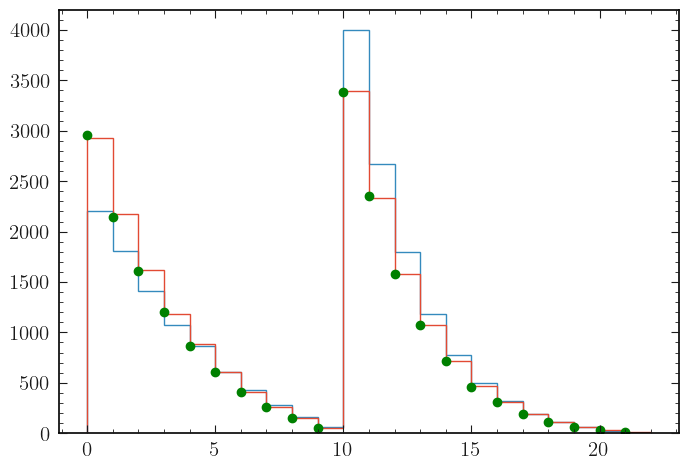

In [6]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
plt.plot(data[:22], 'og')